In [44]:
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

iris = load_iris()

X = iris.data
Y = iris.target

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.fit_transform(test_x)

model = keras.Sequential()      # 딥러닝 설계하는 도화지
model.add(keras.layers.Dense(16, activation = "relu", input_shape = (4,)))   # 입력층에서 은닉층1로 보내므로 relu. 노드 16개
model.add(keras.layers.Dense(8, activation = "relu"))               # 은닉층 2. 노드 8개
model.add(keras.layers.Dense(3, activation = "softmax"))       # 은닉층에서 출력층으로 보내므로 softmax


es = keras.callbacks.EarlyStopping(patience=20, restore_best_weights = True)      # 과대적합 날것같으면 종료하라.. 종료된후 마지막20개는 제외

model.compile(loss = "sparse_categorical_crossentropy",        # 오차를 뭘로 계산할 것인지. 정답지가 숫자로 되어있는 경우 sparse_categorical_crossentropy
                                                                   # 정답지가 원핫인코딩으로 되어있으면 categorical_crossentropy 로 
              optimizer = "adam", metrics = ["accuracy"])    # 최적화함수로 adam함수를 써서 accuracy 높이는 방안으로 학습하겠다

# 기본값: batch_size 32개 => 훈련데이터 112개를 32로 나누면 3.5니까 4개씩 쪼개서 학습
history = model.fit(train_scaled, train_y, epochs = 500,
                    validation_data = (test_scaled, test_y),
                    callbacks = [es])

# val_loss값이 잘 떨어지고 있는지 확인해야함

# 228까지? => 208까지 학습한것

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2589 - loss: 1.1356 - val_accuracy: 0.3158 - val_loss: 1.1035
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3109 - loss: 1.0915 - val_accuracy: 0.3421 - val_loss: 1.0812
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3470 - loss: 1.0698 - val_accuracy: 0.3684 - val_loss: 1.0600
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4015 - loss: 1.0364 - val_accuracy: 0.3684 - val_loss: 1.0395
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4156 - loss: 1.0181 - val_accuracy: 0.5000 - val_loss: 1.0197
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6040 - loss: 0.9982 - val_accuracy: 0.5789 - val_loss: 0.9999
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8277 - loss: 0.9648 - val_accuracy: 0.7632 - val_loss: 0.9806
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8749 - loss: 0.9404 - val_accuracy: 0.8158 - val_loss:

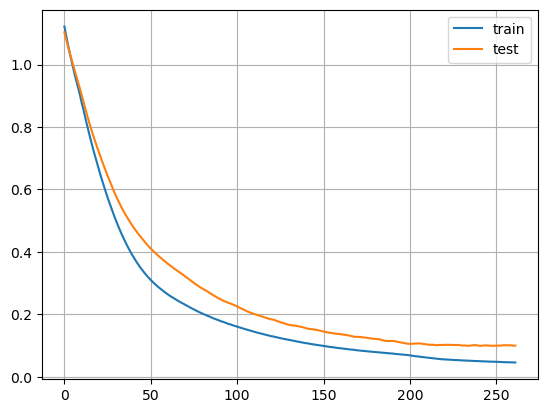

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

## fish2.csv 학습하는 딥러닝 모델 만들기

In [47]:
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [56]:
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Data/fish2.csv")

X = df.drop("Species", axis = 1).values
Y = df["Species"].values

encoder = LabelEncoder()
Y = encoder.fit_transform(Y) 

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)


model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = "relu", input_shape = (5,)))
model.add(keras.layers.Dense(7, activation = "softmax"))  

es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam", metrics = ["accuracy"])

history = model.fit(train_scaled, train_y, epochs=500,
                    validation_data=(test_scaled, test_y), 
                    callbacks=[es])

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.1216 - loss: 2.1301 - val_accuracy: 0.1500 - val_loss: 2.2147
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0711 - loss: 2.1209 - val_accuracy: 0.1250 - val_loss: 2.1663
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0857 - loss: 2.1436 - val_accuracy: 0.1000 - val_loss: 2.1198
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0914 - loss: 2.0679 - val_accuracy: 0.1500 - val_loss: 2.0755
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1348 - loss: 1.9610 - val_accuracy: 0.2000 - val_loss: 2.0332
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1918 - loss: 1.9583 - val_accuracy: 0.2750 - val_loss: 1.9916
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3590 - loss: 1.8991 - val_accuracy: 0.3250 - val_loss: 1.9512
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3402 - loss: 1.8878 - val_accuracy: 0.3000 - val_loss:

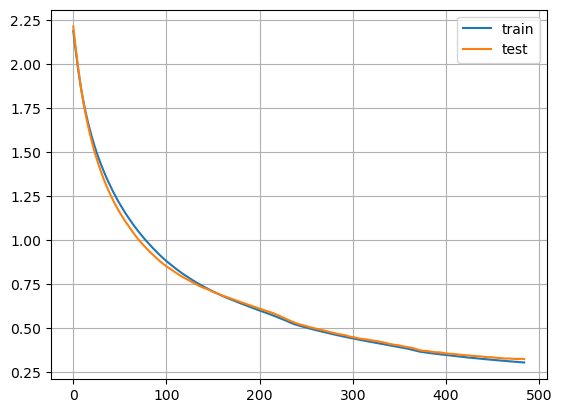

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()